<center><b><h1>Analyzing and Predicting Ratings for Apps on Google Play Store</h1></b></center>

<p>In this ever-changing era of technology and development, the ratio of mobile to desktop is increasing day-by-day. There is a huge outburst in the number of mobile companies launching new phones every single day and this, along with it, has brought an even larger boon in the mobile app market. As of 2019, the users had around 2.6 million Android Apps to choose from and this number is ever-increasing. The Apple App Store and the Google Play Store dominate this landscape and are the two most important marketplaces in the world. Android holds around 53% of the smartphone market.</p>

<p>With the large amount of scope this market possesses, it is important for a developer to know which apps are preferred by the users. This is because most apps are free on these stores, so the major source of revenue is the in-app adds. So, the larger the audience for the app, the larger will be the income for the app. Therefore, we want to analyze the data so as to find out the preferences of users in this domain and to build apps that will bring the best revenue and audience and Mobile App Analytics is a great way to understand the existing strategy to drive growth and retention of future user.</p>
<img src = 'google-play-badge.png'>
<p>User ratings and reviews are huge factor that help in determining the most popular apps among users. Out of the millions of apps in the market, we take around 20k of them and use information such as the genre, reviews, size, price, installs etc and try to predict the user ratings for the apps so that when we develop a new app with certain features, we can predict beforehand how well it will do among the users.</p>


Let's start building our model by first importing the required libraries.

<b><h3>Importing Libraries</h3></b>

In [3]:
#!conda install -c conda-forge matplotlib=3.1.2 --yes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, validation_curve, cross_val_score, cross_val_predict
from sklearn import metrics, feature_selection

<b><h3>Loading the Dataset</h3></b>

<ul><li><p>First, lets load the data set containing information regarding apps on Google Play Store.</p></li></ul>

In [4]:
google_df = pd.read_csv('googleplaystore.csv')
print(google_df.shape)
google_df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<p>Thus we see that there are 10,841 entries in this dataset.</p>

<ul><li><p>Next, we will load the file containing user review and their sentiment analysis in the various columns. We will drop the translated reviews which are long text descriptions in English, and will be using the sentiment analysis to find how about the reviews and their emotions and meaning.</p></li></ul>

In [5]:
greview_df = pd.read_csv('googleplaystore_user_reviews.csv')
print(greview_df.shape)
greview_df.head()

(64295, 4)


,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000


<b><h3>Cleaning Data</h3>
<h4>Basic description of the data</h4></b>

<p>First, lets look at the google_df data frame. This has the major information that interests us. The review dataframe has information regarding sentiments of textual reviews and is not of much interest for now and will be analysed later.</p>

In [6]:
print("The shape of Google Store data frame is ", google_df.shape)

The shape of Google Store data frame is  (10841, 13)


In [7]:
print(google_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [8]:
google_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
google_df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.499557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns method gives information regarding the columns of the dataframes an the describe method gives a lot of insights about the datasets and we can look into it to get a lot of information.

<h4><b>Detecting anomally</b></h4>
<p>In the discussion section of the kaggle datset, we found that one row had a rating of 19 which is not possible as google allows rating from 1 to 5.</p>


In [10]:
google_df.iloc[10472, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Thus, we will remove this row and will not use it in modelling or analysis.

In [11]:
google_df.drop([10472], inplace = True)

In [12]:
google_df.reset_index(inplace = True)
google_df.drop(['index'], axis = 1, inplace = True)
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<b><h4>Removing Duplicate Entries</h4></b>

<p>If we finely explore the google datset, we find that there are duplicate entries. For example, I found the 'Box' entry more than once.

In [13]:
apps = google_df.iloc[:, 0]
for i in range(10840):
    if apps[i] == 'Box':
        print(google_df.iloc[i, :])

App                              Box
Category                    BUSINESS
Rating                           4.2
Reviews                       159872
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                      Business
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 204, dtype: object
App                              Box
Category                    BUSINESS
Rating                           4.2
Reviews                       159872
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                      Business
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 236, dt

<p>We thus see that Box app appeared three times. On going through the data, we see that box entries are same while some of them like instagram app has different number of Reviews (may be depending on the different times at which they were recorded) but there is not much difference in the numbers. So we will remove these duplicate entries so that during analysis and modelling they are not encountered twice.</p>

In [14]:
unique_apps = []
indexes = []
count = 0
for i in range(10840):
    if(google_df.iloc[i, 0] in unique_apps):
        count += 1
        indexes.append(i)
    else:
        unique_apps.append(google_df.iloc[i, 0])
print("There are ",count," duplicate entries and ", len(unique_apps), " unique apps in total")

There are  1181  duplicate entries and  9659  unique apps in total


In [15]:
google_df.drop(indexes, inplace = True)

In [16]:
google_df.reset_index(inplace = True)
google_df.drop(['index'], axis = 1, inplace= True)
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<p>So now that we have elminated the duplicates, we will see the dataset more closely for missing values and column datatypes.</p>

<b><h4>Handling Missing Values</h4></b>

Analysing the data on kaggle, we see that there are not many missing values in most columns but since we dropped the duplicates, so we dont know the exact values. So, lets find out the number of missng values, if any.

In [17]:
missing_data = google_df.notnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

App
True    9659
Name: App, dtype: int64

Category
True    9659
Name: Category, dtype: int64

Rating
True    9659
Name: Rating, dtype: int64

Reviews
True    9659
Name: Reviews, dtype: int64

Size
True    9659
Name: Size, dtype: int64

Installs
True    9659
Name: Installs, dtype: int64

Type
True     9658
False       1
Name: Type, dtype: int64

Price
True    9659
Name: Price, dtype: int64

Content Rating
True    9659
Name: Content Rating, dtype: int64

Genres
True    9659
Name: Genres, dtype: int64

Last Updated
True    9659
Name: Last Updated, dtype: int64

Current Ver
True     9651
False       8
Name: Current Ver, dtype: int64

Android Ver
True     9657
False       2
Name: Android Ver, dtype: int64



<p>1. Handling Type Column</p>

In [18]:
i = google_df[google_df['Type'].isnull()].index
google_df.iloc[i, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,4.193338,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


We see the type column empty and the price is zero, so we will replace the nan with Free Type.

In [19]:
google_df.iloc[8028, 6] = 'Free'
google_df.iloc[8028, :]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                              4.19334
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 8028, dtype: object

<p>2. Handling Current Version and Android Version Column</p>

In [20]:
i = google_df[google_df['Current Ver'].isnull()].index
google_df.iloc[i, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,4.193338,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,4.193338,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,4.193338,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,4.193338,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [21]:
j = google_df[google_df['Android Ver'].isnull()].index
google_df.iloc[j, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


<p>Seeing through the dataset, we cant really fill up current version as the android version and its not right to fill those with mean or median as every app has its own updates and versions. And moreover its just ten entries for both, so it would seem to drop them for the best.</p>
<p>But also, we realise that we will not use these columns in modelling and they wont be used in analysis either. So for now we will just not drop these entire rows as it will lead to loss of other parameters as well and later we can drop the columns if we dont need them at that time.</p>

<h4><b>Handling data types of columns</b></h4>

In [22]:
google_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<p>We see that apart from rating, all the columns are objects. Columns such as App, Category, Content Rating and Genre are supposed to be objects as they are strings but columns such as Reviews, Size, Installs and Price are clearly not object data types.</p>

In [23]:
#changing reviews to float
google_df['Reviews'] = google_df['Reviews'].astype('int64')

#removing characters preventing values from being flaot
google_df["Installs"] = google_df["Installs"].str.replace("+","") 
google_df["Installs"] = google_df["Installs"].str.replace(",","")
google_df["Installs"] = google_df["Installs"].astype("int64")

google_df["Price"] = google_df["Price"].str.replace("$","")
google_df["Price"] = google_df["Price"].astype("float64")

google_df["Size"] = google_df["Size"].str.replace("Varies with device","0")
google_df["Size"] = (google_df["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        google_df["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

<p>So, we changed the data type of the reviews column; stripped off the '+' and ',' in Installs column and then changed the data type to integer. Next, we stripped the dollar sign off the Price values for the paid apps and then changed the type to float and finally, for he size column firstly we replaced the string values 'Varies With device' to 0 and then replace the 'k' and 'M' for 1,000 and 1,000,000 respectively for the size of the apps. 

In [24]:
size_mean = google_df['Size'].mean()
for i in range(9649):
    if(google_df.iloc[i, 4] == 0):
        google_df.iloc[i, 4] = size_mean
print(google_df.iloc[2000, :])

App               Hypertension High blood pressure
Category                                   MEDICAL
Rating                                         3.8
Reviews                                        292
Size                                       2.7e+06
Installs                                    100000
Type                                          Free
Price                                            0
Content Rating                            Everyone
Genres                                     Medical
Last Updated                        April 16, 2018
Current Ver                                   43.0
Android Ver                           4.0.3 and up
Name: 2000, dtype: object


<p>For the apps with Varies with device, we dont want the size to be zero as this is not the case for any app. So we replace that with the average values in the dataframe.</p>

<b><h4>Dropping unnecesary columns</h4></b>

<p>Finally, we will drop the Last Updated, Current Version and Android Version columns as we wont use them and they are irrelevant to our model. Moreover, many of the values in these versions are varying with device and its not useful to impute so many of them and to find the best possible values to impute they wont serve much anyway.</p>

In [25]:
num = google_df[google_df['Current Ver'] == 'Varies with device'].shape[0]
print("There are ", num, " values with Varies with device value for Current Version column!")
num = google_df[google_df['Android Ver'] == 'Varies with device'].shape[0]
print("There are ", num, " values with Varies with device value for Android Version column!")

There are  1055  values with Varies with device value for Current Version column!
There are  990  values with Varies with device value for Android Version column!


In [26]:
google_df.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity


<b><h3>Exploratory Data Analysis</h3></b>
<p>Now lets get a bit more insight of the data and correlation between various features of the data set.</p>

In [27]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 754.7+ KB


In [28]:
google_df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,9659,9659,9659.000000,9.659000e+03,9.659000e+03,9.659000e+03,9659,9659.000000,9659,9659
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,118
top,Sticky Note + : Sync Notes,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools
freq,1,1832,NaN,NaN,NaN,NaN,8903,NaN,7903,826
mean,NaN,NaN,4.176287,2.165926e+05,2.006433e+07,7.777507e+06,NaN,1.099299,NaN,NaN
std,NaN,NaN,0.494365,1.831320e+06,2.041318e+07,5.375828e+07,NaN,16.852152,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,5.300000e+06,1.000000e+03,NaN,0.000000,NaN,NaN
50%,NaN,NaN,4.200000,9.670000e+02,1.600000e+07,1.000000e+05,NaN,0.000000,NaN,NaN
75%,NaN,NaN,4.500000,2.940100e+04,2.500000e+07,1.000000e+06,NaN,0.000000,NaN,NaN


<p>We thus see that most apps are for Family (1829) and almost all of the apps on the Google Play Store are free (~92%). Also, most of them have Everyone content rating i.e. they can be used by all including children. Also for the integer columns, we can get the statistical values like mean, standard deviation, maximum and minimum for further insights.</p>

<b><h5>Most Important Categories</h5></b>

In [29]:
category = google_df['Category'].value_counts().sort_values(ascending = False).to_frame()
category.rename(columns={'Category':'Count'}, inplace = True)
category.index.name = 'Category'
category[:5]

,Count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


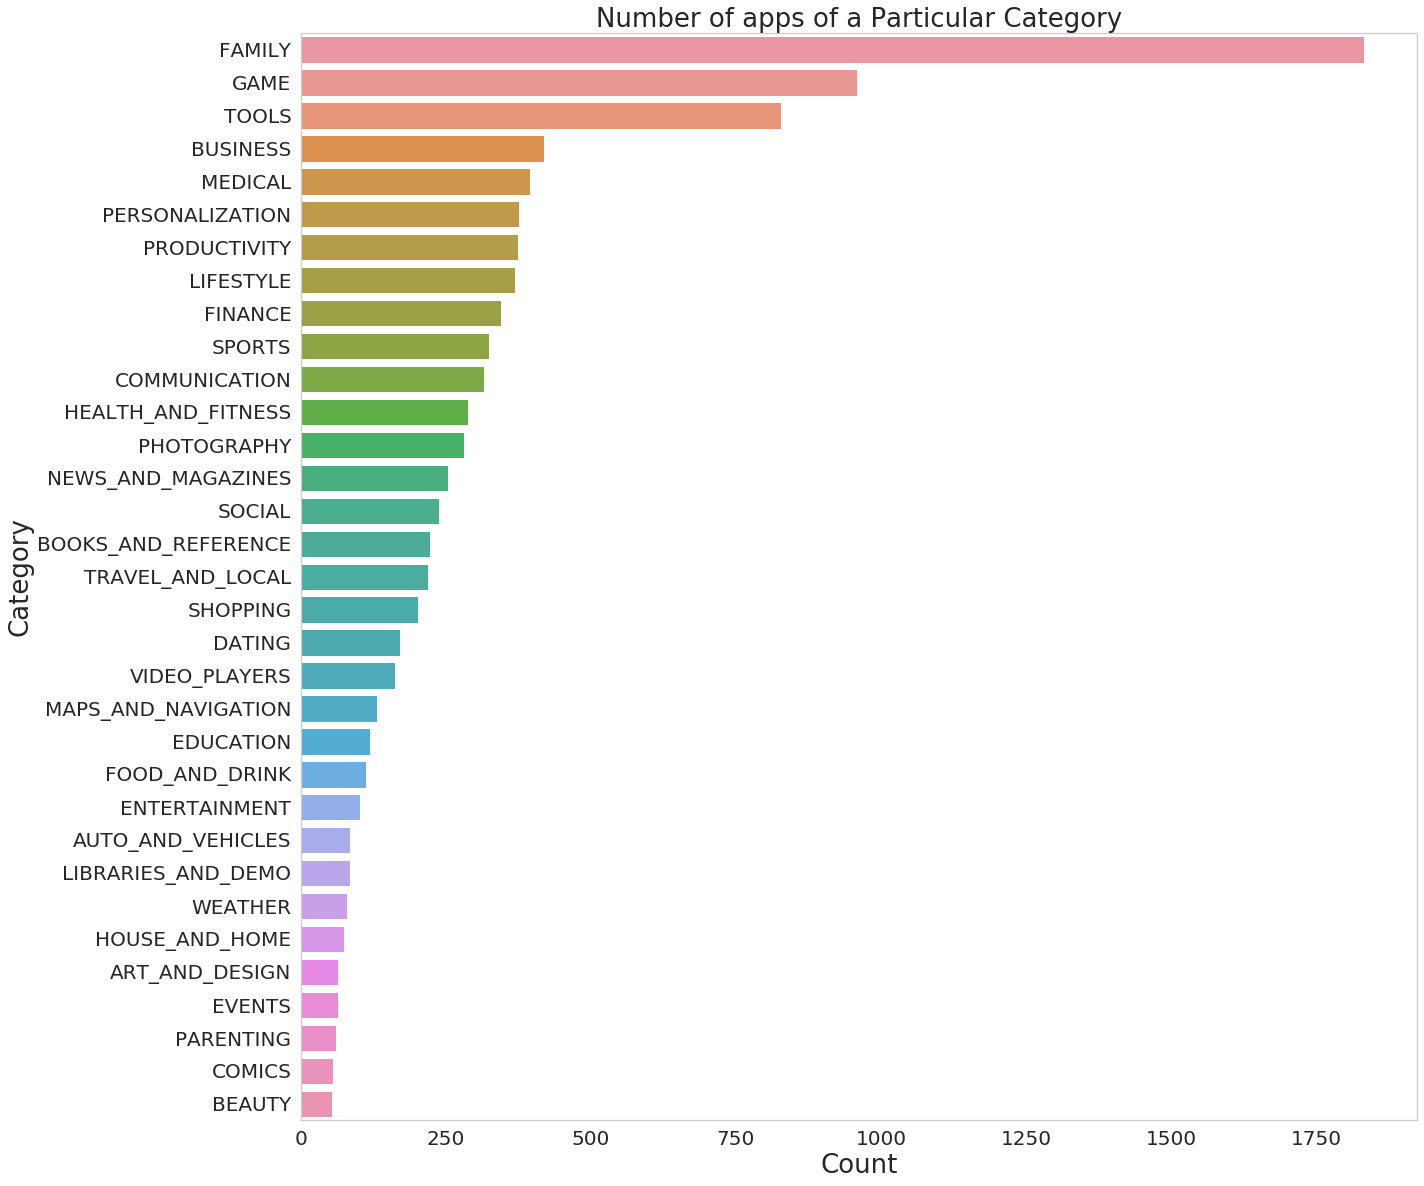

In [30]:
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':26,
            'figure.figsize':(20, 20.0),
            'xtick.labelsize':20,
            'font.size':18,
            'ytick.labelsize':20},
       style = 'whitegrid')
fig = sns.barplot(x = category.Count, y = category.index)
plt.title("Number of apps of a Particular Category", fontsize = 26)
plt.show()

<p><b>Insights:</b> We see that the Family is the most preferred Category followed by Games and then Tools.</p>

<b><h5>Categories and Ratings</h5></b>

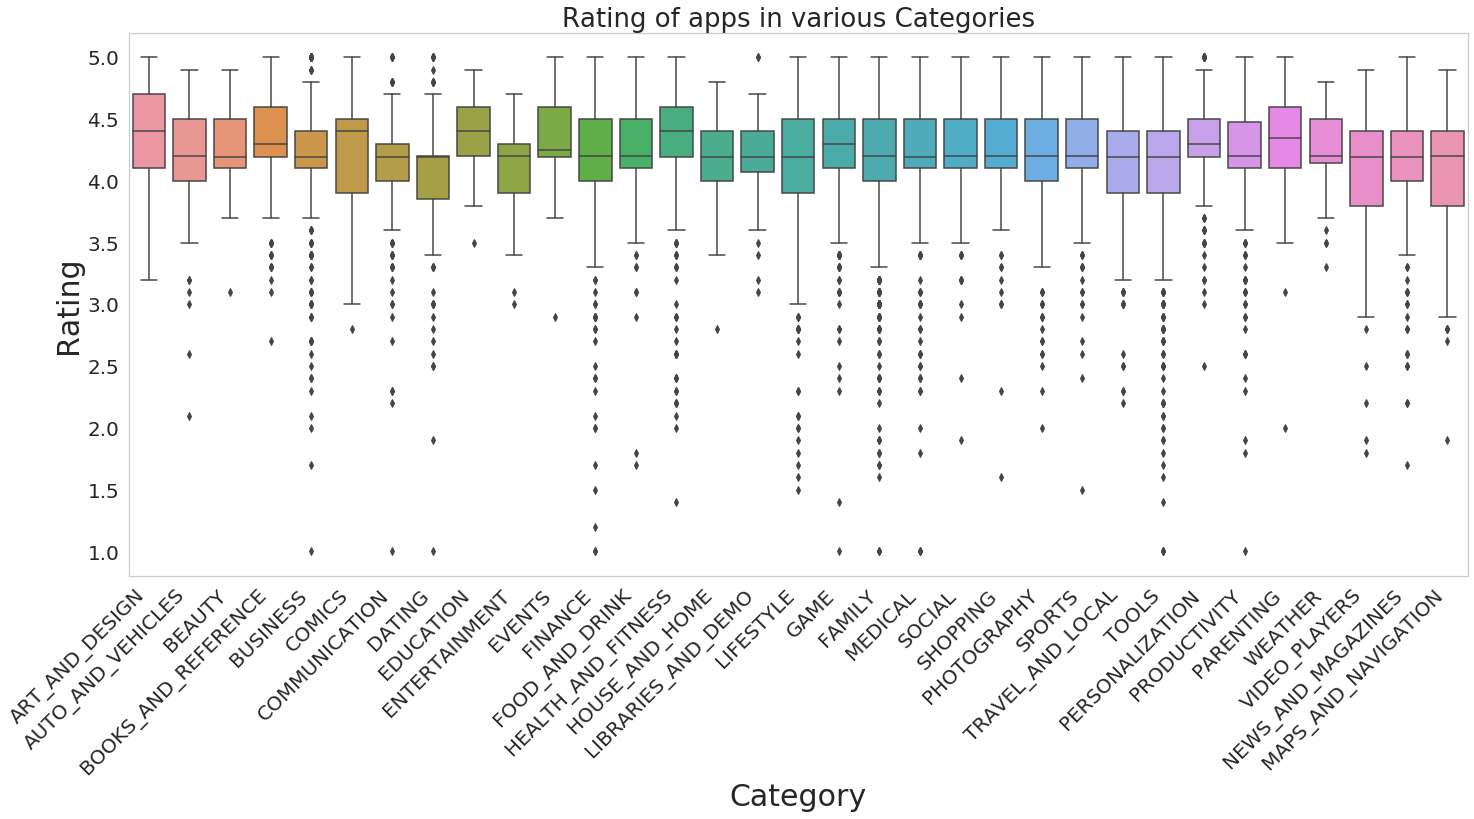

In [31]:
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(24.0, 10.0),
            'xtick.labelsize':20,
            'font.size':18,
            'ytick.labelsize':20},
       style = 'whitegrid')
fig = sns.boxplot(x = 'Category', y = 'Rating', data = google_df)
labels = fig.set_xticklabels(fig.get_xticklabels(), rotation = 45, ha = 'right')
plt.title("Rating of apps in various Categories", fontsize = 26)
plt.show()

<p><b>Insights:</b> With the help of the grid, we see that all the apps have their mean ratings between 4 and 4.5. We also see that while some categories like weather have no outliers, maps and navigation, house and home, events, education ahve one outlier on the other hand, categories like finance, tools, games, family have a lot of outliers. The reason can be due to the presence of large number of apps in these categories thus, increasing the chances of outliers while those with less outliers are also less in number as seen from the graph before.</p>

<b><h5>Categories and Types</h5></b>

In [32]:
cat_type = google_df.groupby(['Category', 'Type'])['App'].count().to_frame()
cat_type.reset_index(inplace = True)
cat_type[:10]

,Category,Type,App
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,194
6,BOOKS_AND_REFERENCE,Paid,28
7,BUSINESS,Free,408
8,BUSINESS,Paid,12
9,COMICS,Free,56


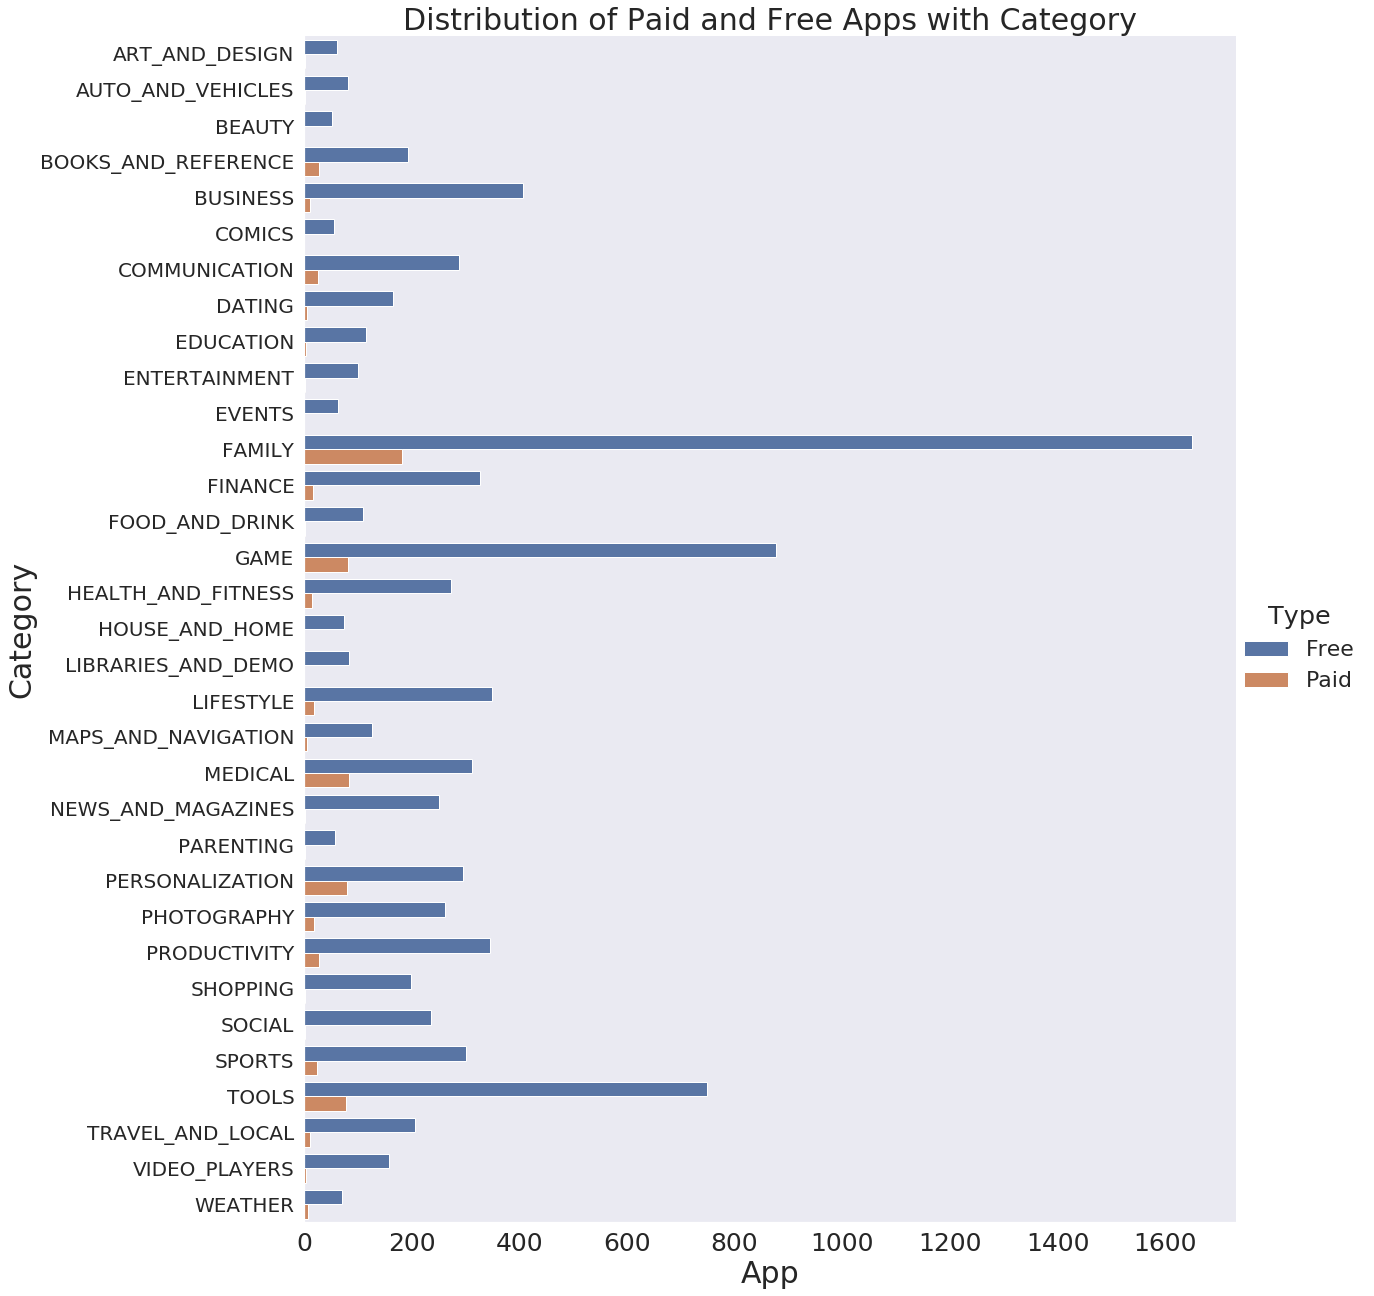

In [33]:
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(24.0, 10.0),
            'xtick.labelsize':25,
            'font.size':20,
            'ytick.labelsize':20},
             font_scale=2)
fig = sns.catplot(x="App", y="Category", hue="Type", data=cat_type, kind="bar", height = 18)
plt.title("Distribution of Paid and Free Apps with Category", fontsize = 30)
plt.show()

<p><b>Insights:</b> Here, we see that in each category the count of free apps is way more than that of paid apps. The category with most number of paid app is family and categories like games, personalization, tools and medical also have quite a few paid apps. rest of the categories have very less paid apps. Similarly, for free apps, family category is at the top followed by games and tools category.</p>

<b><h5>Getting into Reviews</h5></b>

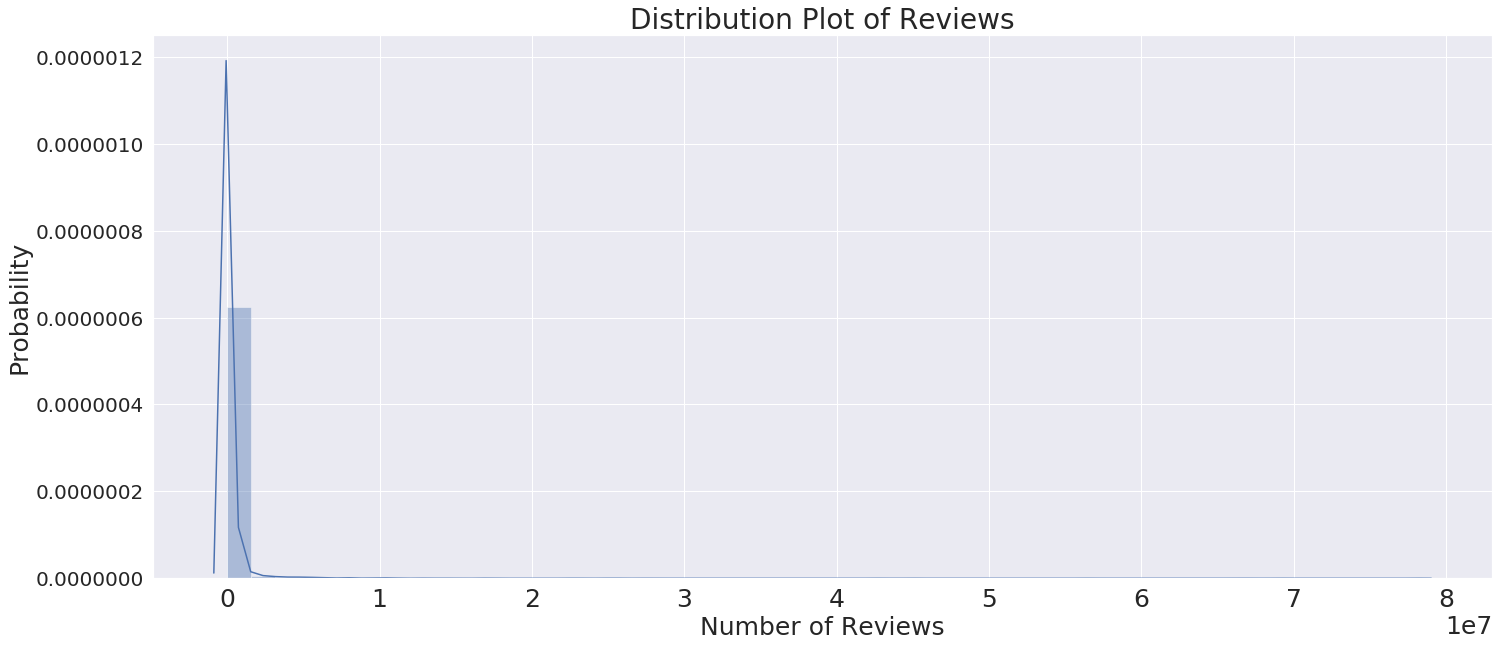

In [34]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':25,
            'figure.figsize':(24.0, 10.0),
            'xtick.labelsize':25,
            'font.size':20,
            'ytick.labelsize':20}
       )
fig = sns.distplot(google_df.Reviews)
fig.set_xlabel('Number of Reviews')
fig.set_ylabel('Probability')
fig.set_title('Distribution Plot of Reviews', fontsize=28)
plt.show()

<p><b>Insights:</b> The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading. With this plot, we see that as the probability of having a very high number of reviews is very less. Most apps have reviews near 1,000,000 from the above plot and this can be confirmed by the fact that the mean of reviews column is 1.310014e+06. Thus, most apps have high chance of having reviews around that value only.</p> 

<h5><b>Most Reviewed Apps</b></h5>

In [35]:
google_df[google_df.Reviews>50000000].sort_values(by = 'Reviews', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2002,Facebook,SOCIAL,4.1,78158306,1.780444e+07,1000000000,Free,0.0,Teen,Social
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.780444e+07,1000000000,Free,0.0,Everyone,Communication
2003,Instagram,SOCIAL,4.5,66577313,1.780444e+07,1000000000,Free,0.0,Teen,Social
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1.780444e+07,1000000000,Free,0.0,Everyone,Communication


<p><b>Insights:</b> We get an interesting insight from this and see that the most viewed apps are the ones related to social media and communication. And this should not be a surprise seeing the popularity and reach these app have got these days. Facebook is the most reviewed app today with 1 Billion+ installs. We also see that although the rating is not very good, yet it is very popular among the users and is most reviewed. In fact all the top reviewed apps dont have the best rating still the are popular among users.</p> 

<b><h5>Reviews and Ratings</h5></b>

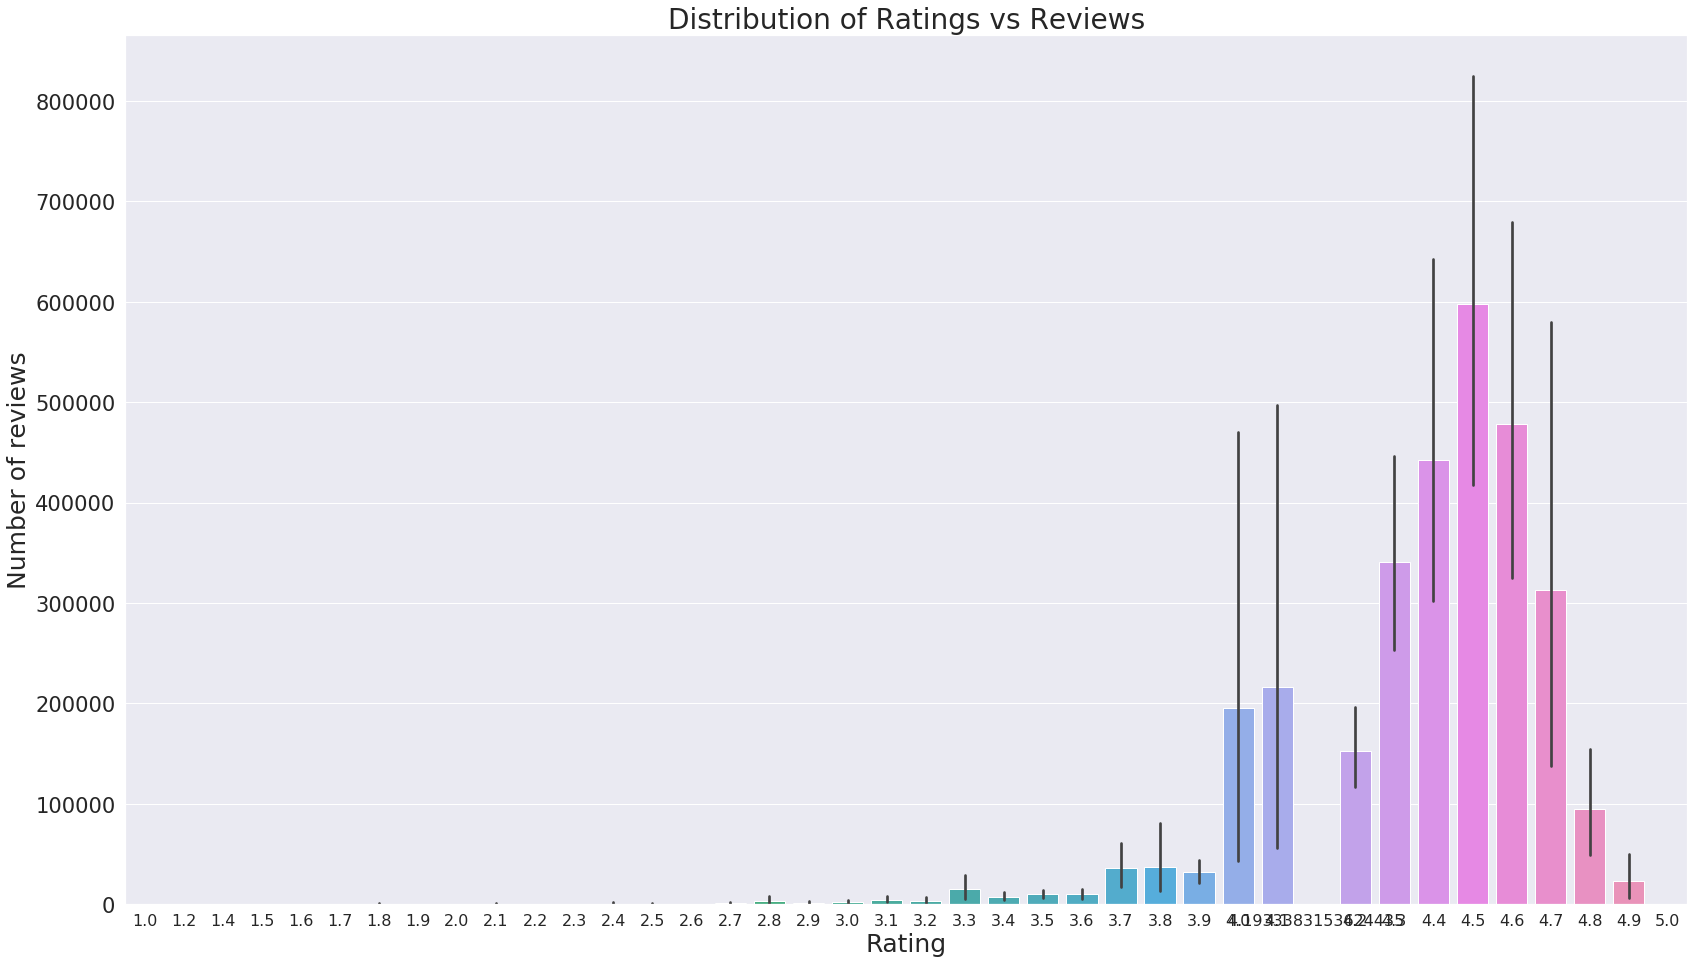

In [36]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':25,
            'figure.figsize':(28.0, 16.0),
            'xtick.labelsize':16,
            'font.size':16,
            'ytick.labelsize':21}
       )
fig = sns.barplot(x = 'Rating', y = 'Reviews', data=google_df)
fig.set_xlabel('Rating')
fig.set_ylabel('Number of reviews')
fig.set_title('Distribution of Ratings vs Reviews', fontsize=28)
plt.show()

<p><b>Insights:</b> Here, we see that the apps with rating around 4.5 are the most rated. And the highest rated apps are not the most rated. In fact, close to 5 rating, number of reviews is very less. It can be due to the fact that the more the number of people rating and reviewing, the more is the variation in the reviews and thus the rating average comes a bit down as not everyone would like the same app the same way.</p>

<h5><b>Number of Installs</b></h5>

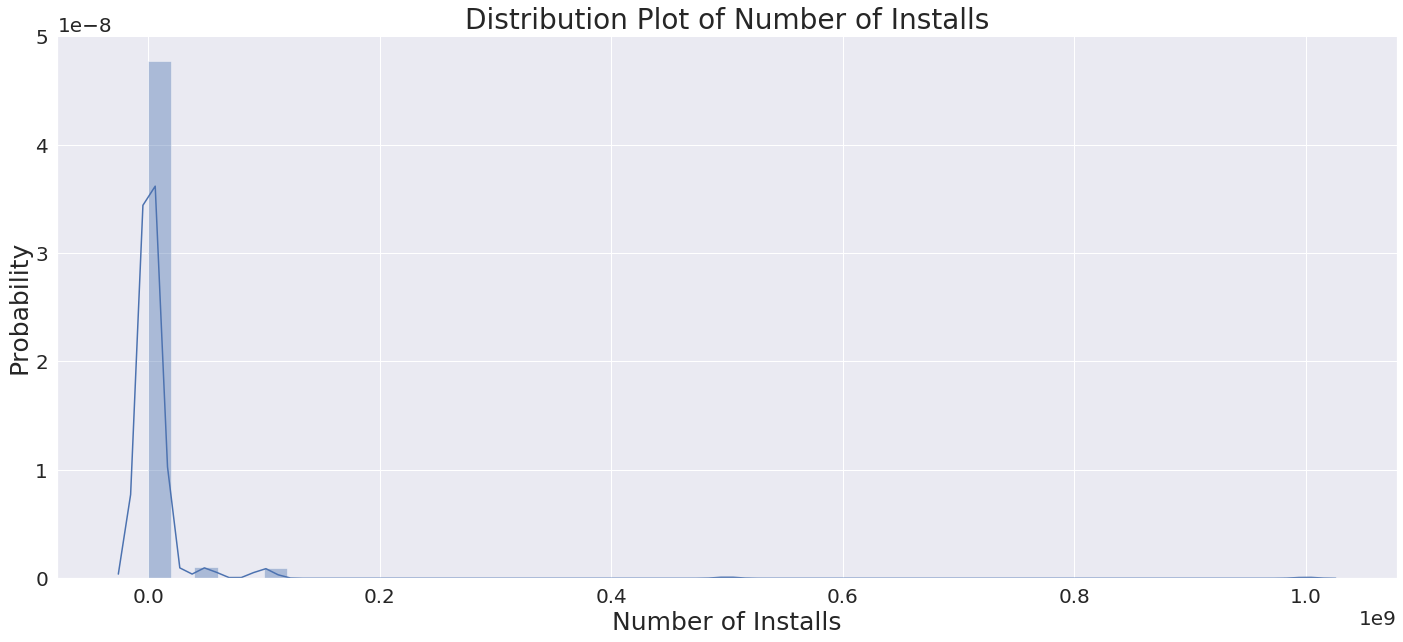

In [37]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':25,
            'figure.figsize':(24.0, 10.0),
            'xtick.labelsize':20,
            'font.size':20,
            'ytick.labelsize':20}
       )
fig = sns.distplot(google_df.Installs)
fig.set_xlabel('Number of Installs')
fig.set_ylabel('Probability')
fig.set_title('Distribution Plot of Number of Installs', fontsize=28)
plt.show()

<b><h5>Most Installed Apps</h5></b>

In [38]:
google_df[google_df.Installs>900000000].sort_values(by = 'Installs', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1.780444e+07,1000000000,Free,0.0,Teen,Books & Reference
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1.780444e+07,1000000000,Free,0.0,Everyone,Communication
2930,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,1.780444e+07,1000000000,Free,0.0,Teen,Video Players & Editors
2908,YouTube,VIDEO_PLAYERS,4.3,25655305,1.780444e+07,1000000000,Free,0.0,Teen,Video Players & Editors
2720,Google Drive,PRODUCTIVITY,4.4,2731171,1.780444e+07,1000000000,Free,0.0,Everyone,Productivity
2507,Google,TOOLS,4.4,8033493,1.780444e+07,1000000000,Free,0.0,Everyone,Tools
2429,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,1.780444e+07,1000000000,Free,0.0,Everyone,Travel & Local
2420,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,1.780444e+07,1000000000,Free,0.0,Everyone,Travel & Local
2191,Google Photos,PHOTOGRAPHY,4.5,10858556,1.780444e+07,1000000000,Free,0.0,Everyone,Photography
2012,Google+,SOCIAL,4.2,4831125,1.780444e+07,1000000000,Free,0.0,Teen,Social


<p><b>Insights:</b> We thus see that all the apps mentioned above have more than 1 Billion installs. These include facebook, instagram, messenger as well (they were the most rated apps). All these apps are very popular among users as we can see and also we find that all these apps are free which is obvious because users would prefer to download free apps. Also we see that none of these apps are rated adult and all are either 'Teen' or 'Everyone' rated which is again an obvious insight as more flexible the rating, higher will be the audience.</p> 

<h5><b>Installs and Ratings</b></h5>

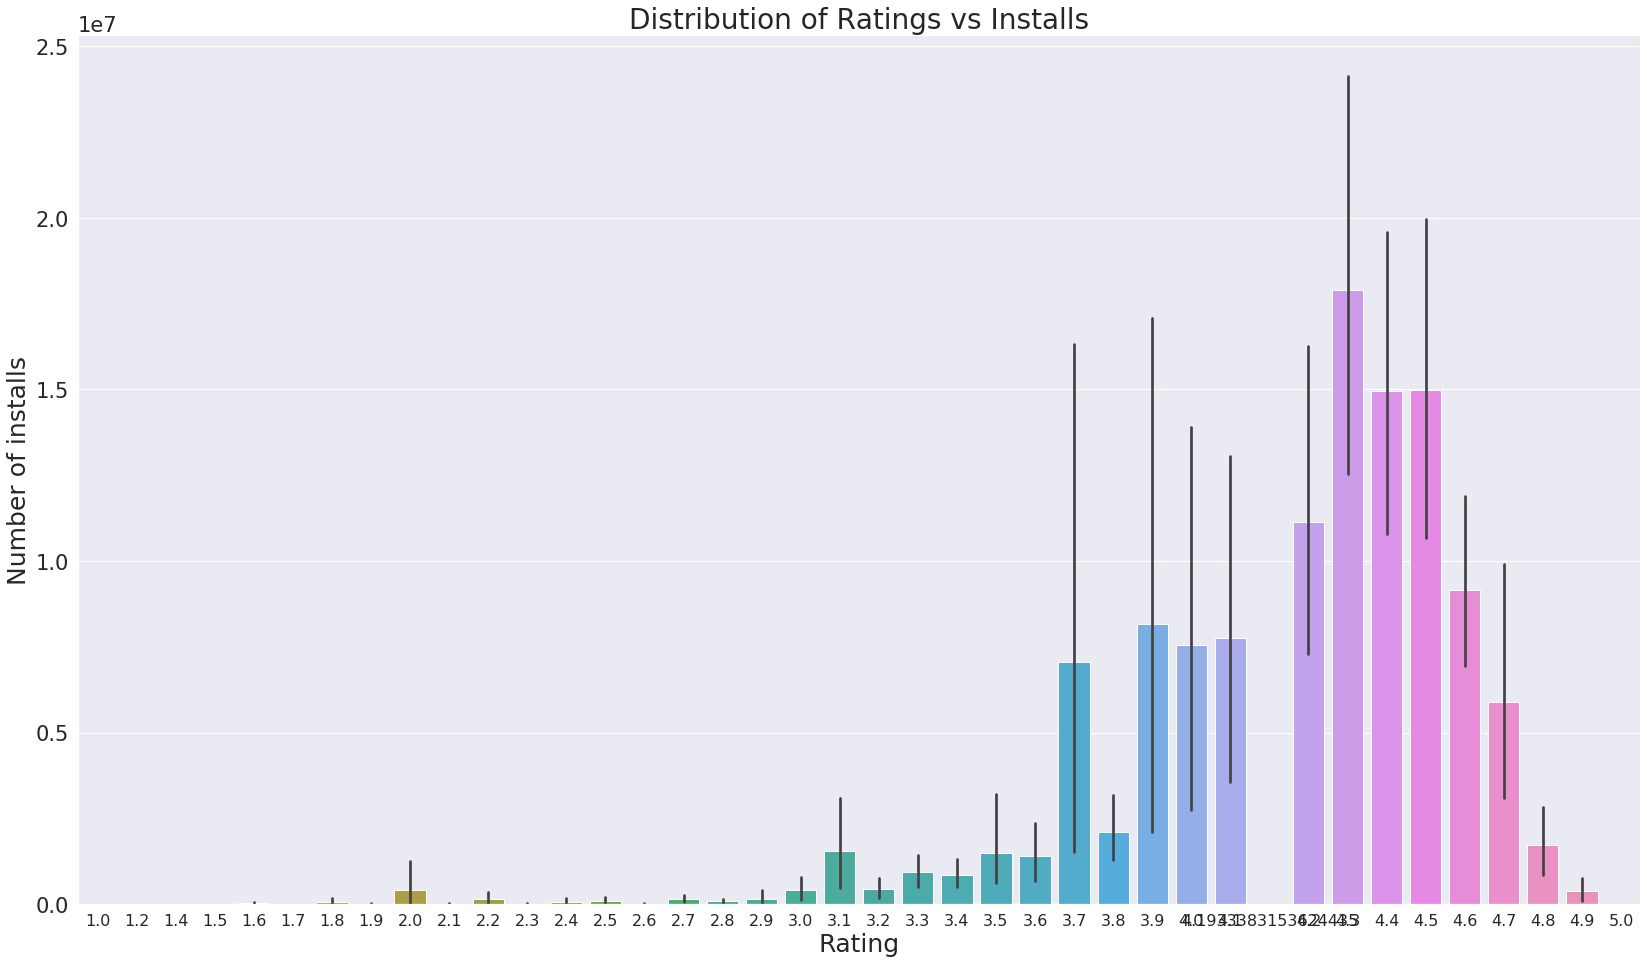

In [39]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':25,
            'figure.figsize':(28.0, 16.0),
            'xtick.labelsize':16,
            'font.size':16,
            'ytick.labelsize':21}
       )
fig = sns.barplot(x = 'Rating', y = 'Installs', data=google_df)
fig.set_xlabel('Rating')
fig.set_ylabel('Number of installs')
fig.set_title('Distribution of Ratings vs Installs', fontsize=28)
plt.show()

<p><b>Insights:</b> We find quite a few number of spikes in this graph but overall again, the number of installs is highest around the mean rating of 4.3 ~ 4.5.</p> 

<h5><b>Installs and Type</b></h5>

In [40]:
inst_type = google_df.groupby(['Type'])['Installs'].sum().to_frame()
inst_type.reset_index(inplace = True)
inst_type

,Type,Installs
0,Free,75065572646
1,Paid,57364881


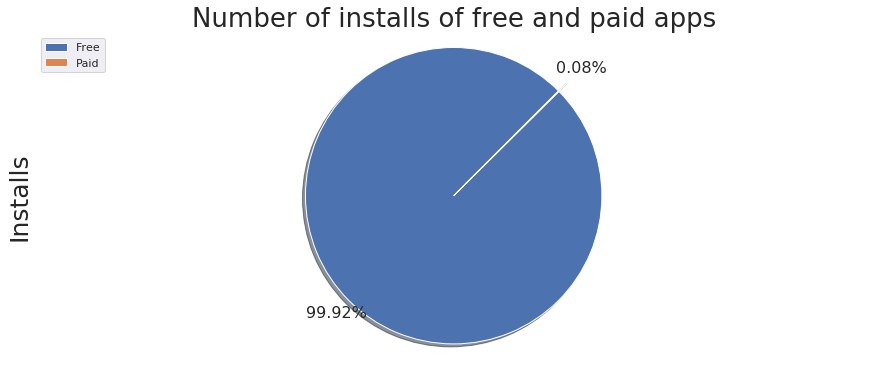

In [41]:
fig = inst_type['Installs'].plot(kind = 'pie',
                          figsize = (15, 6),
                          autopct = '%1.2f%%',
                          startangle = 45,
                          shadow = True,
                          labels = None,
                          pctdistance = 1.12,
                          explode = [0, 0.1])

plt.title('Number of installs of free and paid apps', fontsize = 26) 
plt.axis('equal') 
# add legend
plt.legend(labels=inst_type.Type, loc='upper left') 

plt.show()

<p><b>Insights:</b > Thus, we can see from the number and plot that people prefer to install free apps way more than paid apps. And so, any developer should aim to make his app free.</p>

<h5><b>Paid apps and Installs</b></h5>

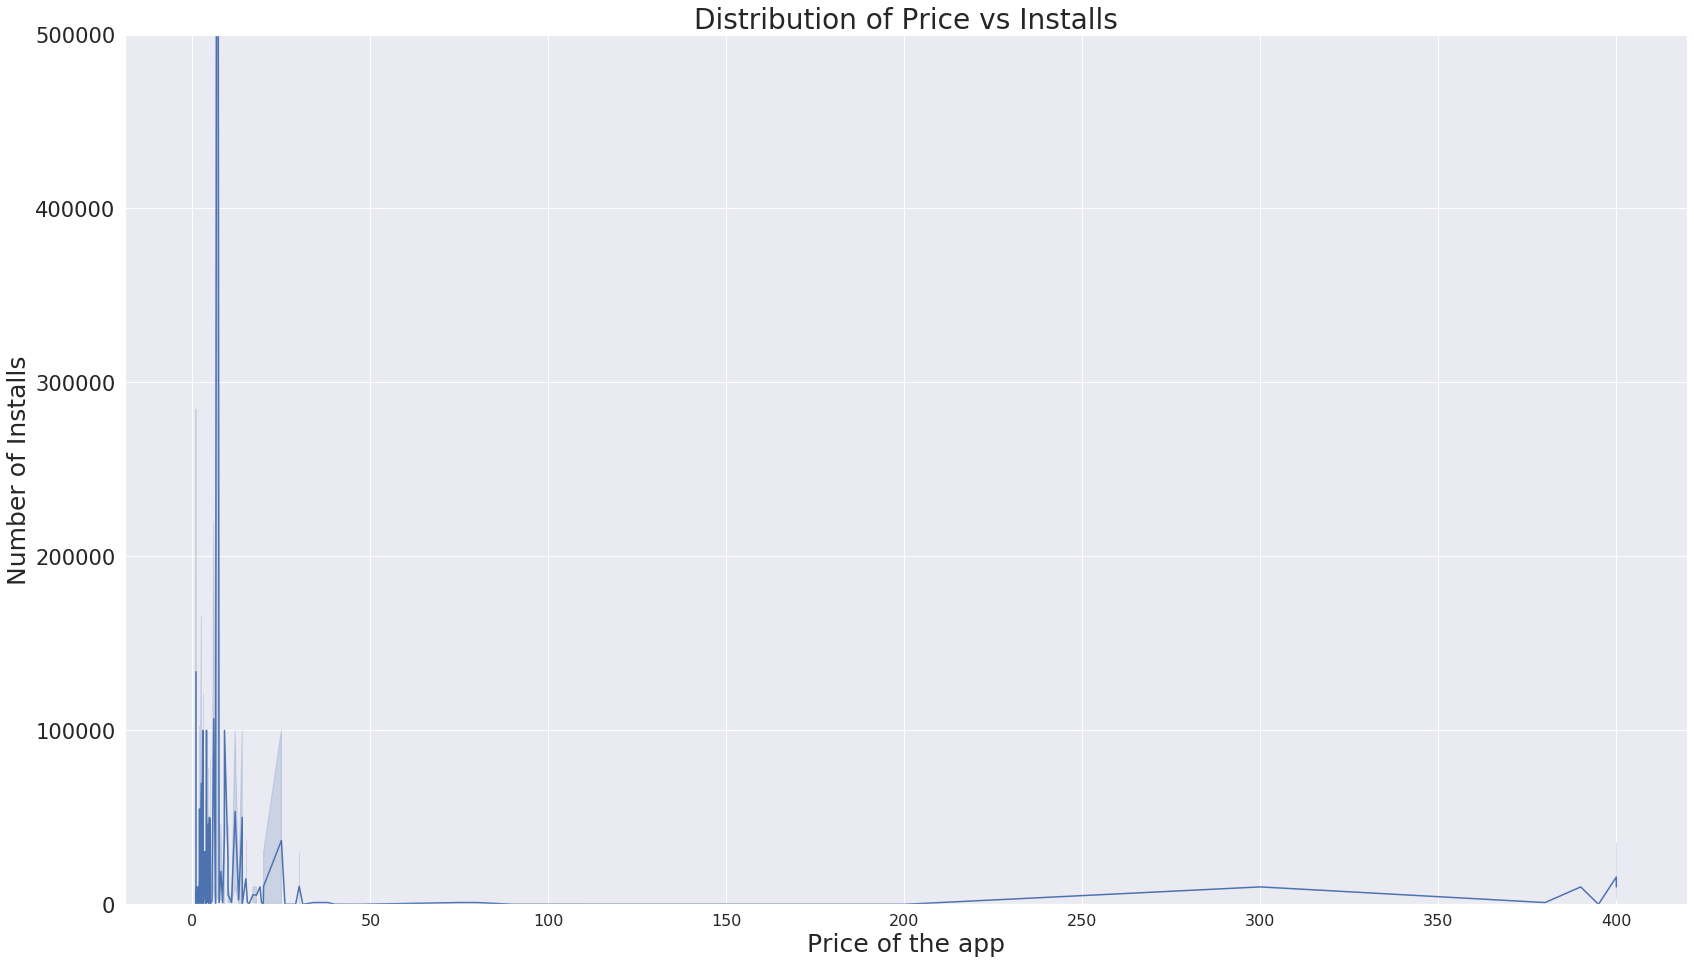

In [42]:
paid = google_df[google_df.Type == 'Paid'].sort_values(by = 'Price', ascending=False)
sns.set(rc={"font.style":"normal",
            'axes.labelsize':25,
            'figure.figsize':(28.0, 16.0),
            'xtick.labelsize':16,
            'font.size':16,
            'ytick.labelsize':21}
       )
fig = sns.lineplot(x = 'Price', y = 'Installs', data=paid)
fig.set_xlabel('Price of the app')
fig.set_ylabel('Number of Installs')
fig.set_ylim(0, 500000)
fig.set_title('Distribution of Price vs Installs', fontsize=28)
plt.show()

<p><b>Insights:</b> We can see that although  with there is some demand of apps with minimal prices aruond 0 to 25$ but the higher paid apps are not usually preferred by the people. Of course, who would want to spend a ton of money on app alone. So even if a developer aims to make his app paid, he may get customers if his rates are minimal and the content has to be very good for him to succeed.</p>

<h5><b>What about size?</b></h5>

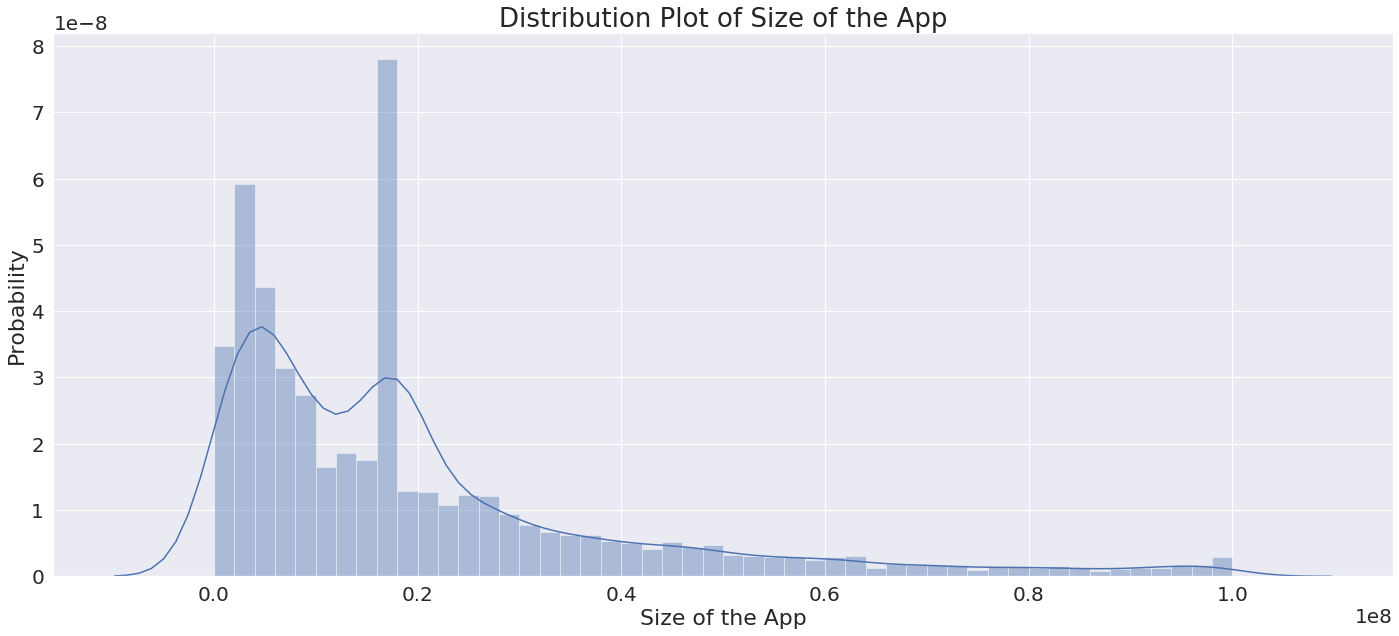

In [43]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':22,
            'figure.figsize':(24.0, 10.0),
            'xtick.labelsize':20,
            'font.size':20,
            'ytick.labelsize':20}
       )
fig = sns.distplot(google_df.Size)
fig.set_xlabel('Size of the App')
fig.set_ylabel('Probability')
fig.set_title('Distribution Plot of Size of the App', fontsize=26)
plt.show()

<p><b>Insights:</b> So, it is clear to see that apps around size 0 to 2 M are mostly found in the dataset. This is also a major factor as the developer would not want to take his app too heavy so that it takes up too much space. Small sized apps are always a preference for users as they may have space issues in their mobiles. Although, in today's era, the capacity of a mobile phone has increased a lot in terms of space, still its always preferable to make small sized apps.</p>

<h5><b>Content Rating</b></h5>

In [44]:
content = google_df['Content Rating'].value_counts().to_frame()
content.rename(columns={'Content Rating':'Counts'}, inplace=True)
content.index.name = 'Content Rating'
content.reset_index(inplace=True)
content

,Content Rating,Counts
0,Everyone,7903
1,Teen,1036
2,Mature 17+,393
3,Everyone 10+,322
4,Adults only 18+,3
5,Unrated,2


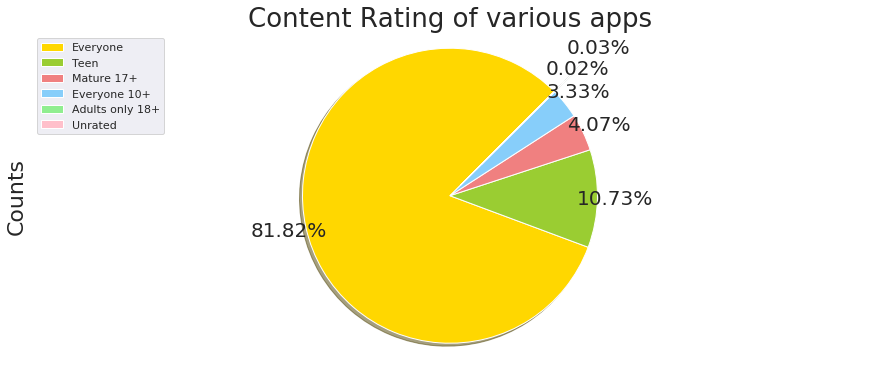

In [45]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
content['Counts'].plot(kind = 'pie',
                          figsize = (15, 6),
                          autopct = '%1.2f%%',
                          startangle = 45,
                          shadow = True,
                          labels = None,
                          pctdistance = 1.12,
                          explode = [0,0,0,0,0.3,0.1],
                          colors = colors_list)

plt.title('Content Rating of various apps', fontsize = 26) 
plt.axis('equal') 
# add legend
plt.legend(labels=content['Content Rating'], loc='upper left') 

plt.show()

<p><b>Inights:</b> Thus, we see ~82% of the apps have 'Everyone' rating which means that it safe to use for everyone including the children. Next most common category is 'Teen' which has around 11% of the apps. Unrated and Adult only apps are only 2 and 3 in number respectively. Thus, most developers don't want to make adult apps as it limits their viewership and number of people who would see it would be limited.</p>

<h5><b>Content Raing and Installs

In [46]:
content = google_df.groupby(['Content Rating'])['Installs'].sum().to_frame()
content.reset_index(inplace = True)
content

,Content Rating,Installs
0,Adults only 18+,2000000
1,Everyone,52179352961
2,Everyone 10+,4016271795
3,Mature 17+,2437986878
4,Teen,16487275393
5,Unrated,50500


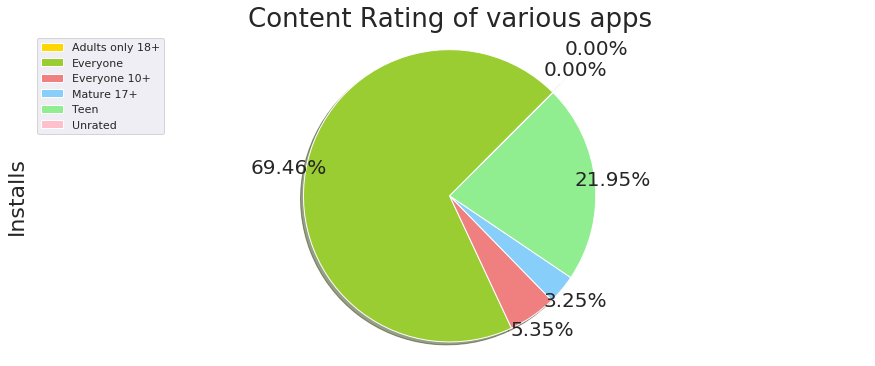

In [47]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
content['Installs'].plot(kind = 'pie',
                          figsize = (15, 6),
                          autopct = '%1.2f%%',
                          startangle = 45,
                          shadow = True,
                          labels = None,
                          pctdistance = 1.12,
                          explode = [0.1,0,0,0,0,0.3],
                          colors = colors_list)

plt.title('Content Rating of various apps', fontsize = 26) 
plt.axis('equal') 
# add legend
plt.legend(labels=content['Content Rating'], loc='upper left') 

plt.show()

<h5><b>Type of the App</b><h5>

In [48]:
type = google_df['Type'].value_counts().to_frame()
type

,Type
Free,8903
Paid,756


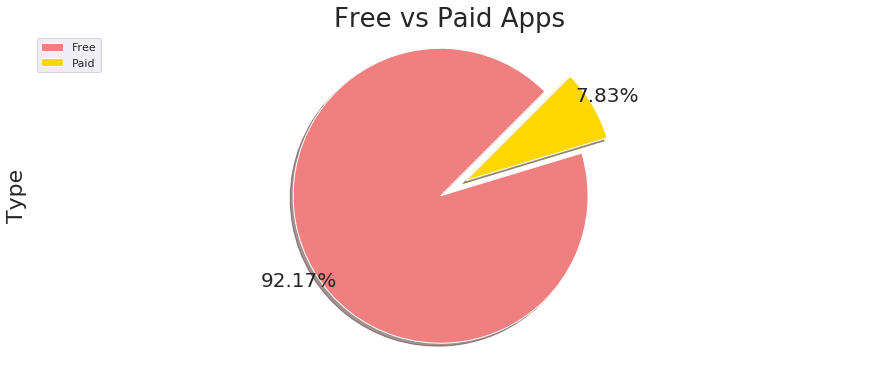

In [49]:
colors_list = ['lightcoral', 'gold']
type['Type'].plot(kind = 'pie',
                          figsize = (15, 6),
                          autopct = '%1.2f%%',
                          startangle = 45,
                          shadow = True,
                          labels = None,
                          pctdistance = 1.12,
                          explode = [0, 0.2],
                          colors = colors_list)

plt.title('Free vs Paid Apps', fontsize = 26) 
plt.axis('equal') 
# add legend
plt.legend(labels=type.index, loc='upper left') 

plt.show()

<p><b>Insight: </b> With no surprises, maximum number of apps, ~92%,  are free on Google Play Store. We saw this earlier also with the categories plot where almost all categories had majority of free apps and also when we counted installs of free and paid apps with ~99.9% installs comprising of free apps.</p>

<h5><b>Exploring Genres</b></h5>

In [50]:
genres = google_df['Genres'].value_counts().to_frame()
genres.rename(columns={'Genres':'Counts'}, inplace=True)
genres.index.name = 'Genres'
genres.reset_index(inplace=True)
genres.sort_values(by = 'Counts', inplace = True, ascending = False)
genres[:10]

,Genres,Counts
0,Tools,826
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395
5,Personalization,376
6,Productivity,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


<p>Lets plot the graph for the first 50 genres only</p>

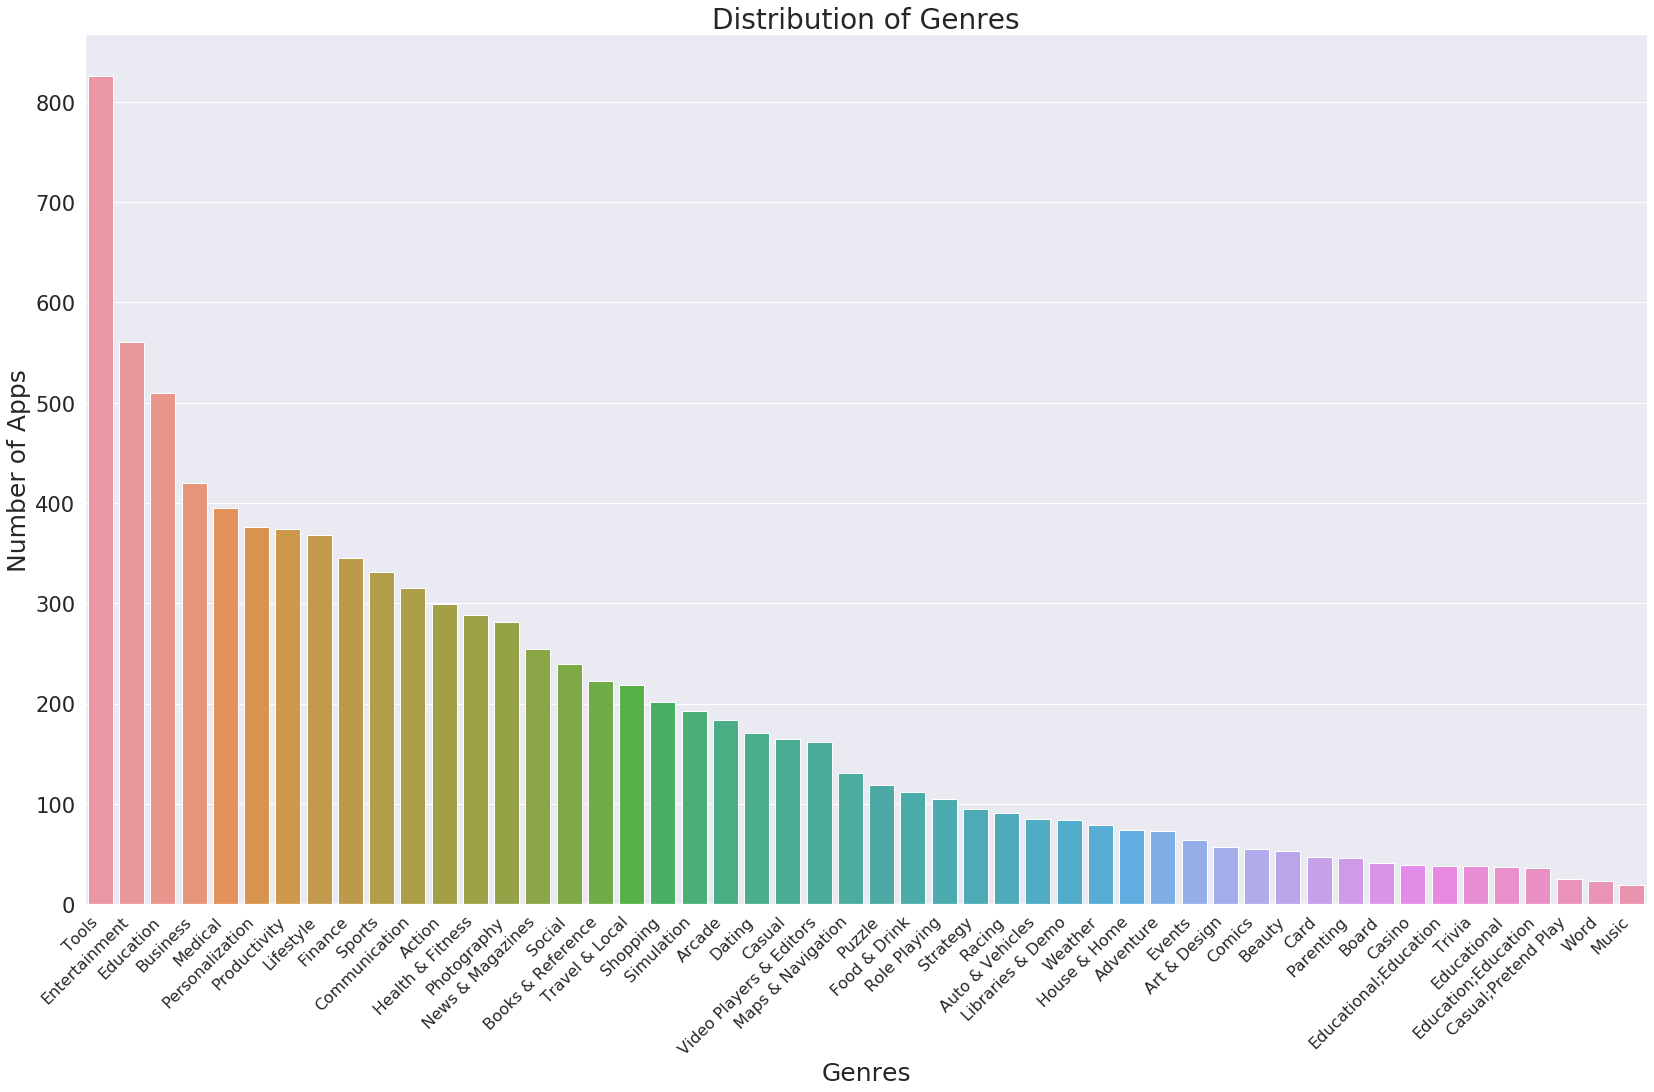

In [51]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':25,
            'figure.figsize':(28.0, 16.0),
            'xtick.labelsize':16,
            'font.size':16,
            'ytick.labelsize':21}
       )
fig = sns.barplot(x = 'Genres', y = 'Counts', data=genres[:50])
labels = fig.set_xticklabels(fig.get_xticklabels(), rotation = 45, ha = 'right')
fig.set_xlabel('Genres')
fig.set_ylabel('Number of Apps')
fig.set_title('Distribution of Genres', fontsize=28)
plt.show()

<p><b>Insights: </b> Thus we see that Tools is the most preferred genre followed by Entertainment and Education. We may feel that although family category was the most famous, so it should be most preferred genre as well. Well the intuition is right, but we must not forget that in the genres column we have ; separated values as well which take into account the multiple genres an app may have. So the unique values take them as a whole and thus we can not say that the category most preferred will be most preferred genre unless we separate the unique values separated by ';'.</p>

<h5><b>Pairwise Plot of Important Features</b></h5>

In [ ]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':15,
            'figure.figsize':(28.0, 16.0),
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10}
       )
features = ['Rating', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
plt.figure(figsize=(22,22))
sns.pairplot(google_df[features])
plt.show()

<Figure size 1584x1584 with 0 Axes>

<p><b>Insight: </b> With the help of pairwise plot, we can see how the various features plot against each other and see the relation they have with each other.</p>

<b><h5>Correlation Map and Correlation Matrix</h5></b>

In [ ]:
google_df.corr()

In [ ]:
sns.set(rc={"font.style":"normal",
            'axes.labelsize':17,
            'figure.figsize':(12.0, 8.0),
            'xtick.labelsize':12,
            'font.size':12,
            'ytick.labelsize':12}
       )
fig = sns.heatmap(google_df.corr(),annot=True)
plt.title('Correlation analysis',fontsize=20)
plt.show()

<p><b>Insights:</b> From the above correlation map, we see that there is not linear relation for any two features except for Reviews and Installs which have a possibility of some sort of linear relationship with each other. Apart from that and the diagonals all values are pretty close to zero which indicates that these features have weak linear dependence on each other.</p>

<h5><b>Looking at the Reviews Dataframe</b></h5>

In [ ]:
review = greview_df['App'].value_counts().to_frame()
review.rename(columns={'App':'Count'}, inplace=True)
review.index.name = 'App'
review.sort_values(by='Count', ascending=False, inplace=True)
review

Thus, we see we have reviews for 1074 different apps in this data frame and we see the count of reviews for each app. And we find out that Bowmasters, Angry Birds and CBS Sports Apps have the most number of reviews in this data frame. But we also see that this has reviews for only around 1074 apps while there are 9569 apps in the other data set. So this does not have information regarding all the apps and so we will not rely on this data set.

In [ ]:
review = greview_df.groupby(['App']).mean()
review.reset_index(inplace=True)
review.sort_values(by='Sentiment_Polarity', ascending=False, inplace=True)
review[:10]

Polarity, also known as orientation is the emotion expressed in the sentence. It can be positive, negative or neutral. Subjectivity is when text is an explanatory article which must be analysed in context of the textual review. We see that Home Work App has the highest sentiment polarity of 1 i.e. its reviews have positive emotions followed by the Google Slides App with sentiment polarity 0.934 which is also very high.

<h3><b>Modelling the Data</b></h3>

<h5><b>Forming the Train and Test Set</b></h5>

In [ ]:
y = google_df['Rating']
google_df.drop(['Rating'], axis = 1, inplace = True)
X = google_df
X.head()

In [ ]:
y[:5]

<p>First, we will split the data frame to indepedent and dependent variables. Here, we ewill be predicting Rating in our model so it will be our dependent variable.</p>

<h5><b>Label encoding Category, Type, Content Rating and Genres</b></h5>

In [ ]:
label_encoder = LabelEncoder() 

X['Category']= label_encoder.fit_transform(X['Category']) 
X['Content Rating']= label_encoder.fit_transform(X['Content Rating']) 
X['Genres']= label_encoder.fit_transform(X['Genres']) 
X['Type'] = label_encoder.fit_transform(X['Type'])
X.head()

In [ ]:
X.drop('App', axis = 1, inplace=True)

<p>Next, we dropped the names off the apps and also labe lencoded the features category, content rating, genres and type as we cant use string in modelling process.</p>

<h5><b>Showing the dependency of features on target

In [61]:
feature_selection.mutual_info_regression(X,y)

array([0.04664518, 0.43318585, 0.04706531, 0.36036848, 0.        ,
       0.00375351, 0.00375577, 0.06135402])

<p>This array shows the dependency of the eight columns Category, Reviews, Size, Installs, Type, Price, Content Rating and Genres with the target variable Rating which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. We see that Reviews and Installs semm to have a higher dependency than others.</p>

<h5><b>Scaling the data</b></h5>

In [62]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Next, we will scale the data so that the training is faster and smoother.

<h5><b>Train and Test Split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=200)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7244, 8) (7244,) (2415, 8) (2415,)


<h5><b>Random Forest Regression</b></h5>

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
pred_train = regressor.predict(x_train)
pred_test = regressor.predict(x_test)
print("The mean squared error for the train set is: ", metrics.mean_squared_error(y_train, pred_train)," and for the test set is: ", metrics.mean_squared_error(y_test, pred_test))

The mean squared error for the train set is:  0.03139648343522824  and for the test set is:  0.22994240571147354


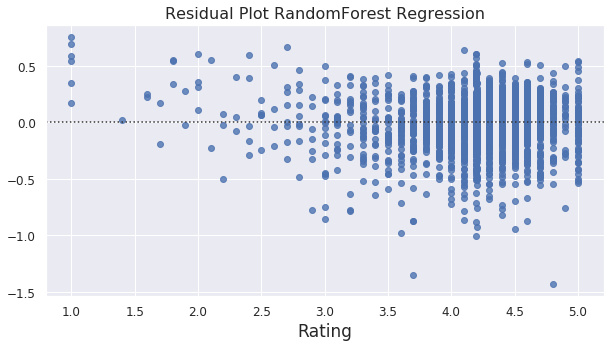

In [67]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,pred_test)
plt.title('Residual Plot RandomForest Regression',fontsize=16)
plt.show()

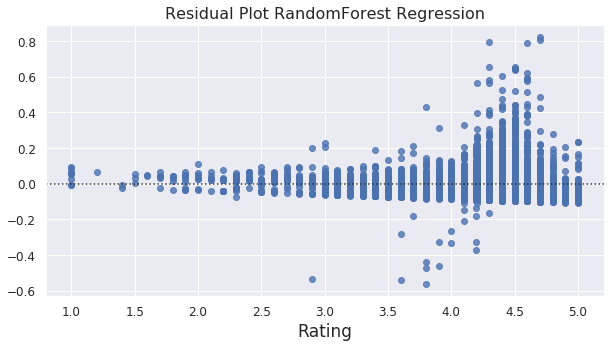

In [75]:
plt.figure(figsize=(10,5))
sns.residplot(y_train,pred_train)
plt.title('Residual Plot RandomForest Regression',fontsize=16)
plt.show()

We thus see that the mean squared error is very less for the train set but it increases a bit on the test set.

<h5><b>Elastic Net Regression

In [76]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(max_iter=5000)
poly = PolynomialFeatures(degree=2).fit(x_train)
x_poly = poly.transform(x_train)
en.fit(x_poly,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
x_test_poly = poly.transform(x_test)
pred_train = en.predict(x_poly)
pred_test = en.predict(x_test_poly)
print("The mean squared error for the train set is: ", metrics.mean_squared_error(y_train, pred_train)," and for the test set is: ", metrics.mean_squared_error(y_test, pred_test))

The mean squared error for the train set is:  0.24119110292691903  and for the test set is:  0.2539542436367875


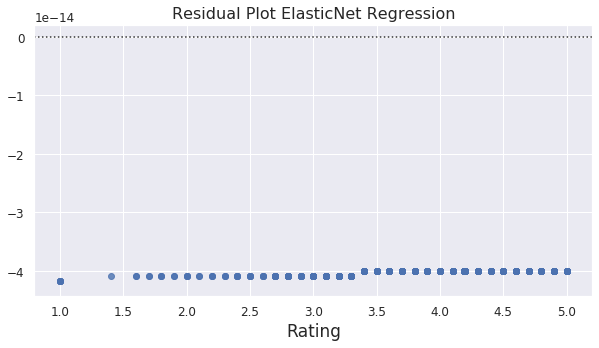

In [78]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,pred_test)
plt.title('Residual Plot ElasticNet Regression',fontsize=16)
plt.show()

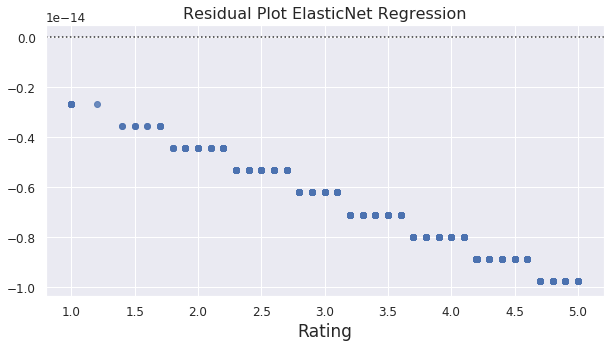

In [79]:
plt.figure(figsize=(10,5))
sns.residplot(y_train,pred_train)
plt.title('Residual Plot ElasticNet Regression',fontsize=16)
plt.show()

<h5><b>Ridge Regression

In [80]:
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(degree=2).fit(x_train)
x_poly = poly.transform(x_train)
rr = Ridge(max_iter=1000,alpha=0.1)
rr.fit(x_poly,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
x_test_poly = poly.transform(x_test)
pred_train = rr.predict(x_poly)
pred_test = rr.predict(x_test_poly)
print("The mean squared error for the train set is: ", metrics.mean_squared_error(y_train, pred_train)," and for the test set is: ", metrics.mean_squared_error(y_test, pred_test))

The mean squared error for the train set is:  0.23562378609787077  and for the test set is:  0.25423304652525625


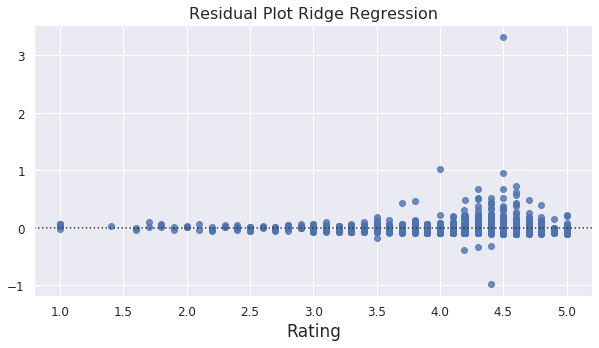

In [82]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,pred_test)
plt.title('Residual Plot Ridge Regression',fontsize=16)
plt.show()

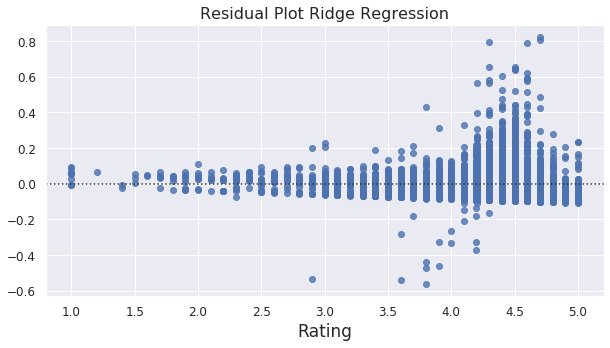

In [83]:
plt.figure(figsize=(10,5))
sns.residplot(y_train,pred_train)
plt.title('Residual Plot Ridge Regression',fontsize=16)
plt.show()

<b>Result:</b> Thus, we run a few different regressors but we see that random forest regressor has the least error for the train and the test set and so it is our best model to predict the rating.
<table>
    <tr>
        <th><b>Model</b></th>
        <th><b>Mean Squared Error (Train)</b></th>
        <th><b>Mean Squared Error (Test)</b></th>
    </tr>
    <tr align = "center">
        <td>Random Forest Regression</td>
        <td>0.03139</td>
        <td>0.22994</td>
    </tr>
    <tr align = "center">
        <td>Ridge Regression</td>
        <td>0.23563</td>
        <td>0.25423</td>
    </tr>
    <tr align = "center">
        <td>Elastic Net Regression</td>
        <td>0.24119</td>
        <td>0.25395</td>
    </tr>
</table>

<h3><b>Conclusion

From the above analysis of the dataset, we conclude:
    <ul>
    <li>The Developers should build some quality apps in the categories like Weather, Art and Design, Beauty etc as there are less number of apps in that category so there are chances of getting more likes if the content is good. Also the famous categories like family, tools should have apps the best content if a new app is made in the category as there already exits so many choices to the user.</li>
    <li>The advertising comapnies should adertise on the top 40 most installed apps as the will have a large viewership and they can reach to maximum number of people through that. Also the apps with high reviews can be considered as they will have a high audience that's why they have high number of reviews. But these to features usually go side by side so just look into the top installed apps and you will have a way.</li>
    <li>Everyone building apps should consider that the Category and Genre of an app may strongly dictate if an app will be popular or not. For example: Maybe there won't be much audience for beauty apps apart from women but still if the quality of app is very good, then your app can do well. However, the Size, Type, Price, Content Rating, and Genre features should all be used to most accurately determine if an app will gain maximum installs as these features also affect the audience.</li>